Q.1

Let us assume two matrices of size nxk and kxm, the number of multiplication required are n x k x m, as there are n row vector, of size k, multiplied to m coloumn vector of size k, each vector multiplication contain k multiplications, as there are k elements.Hence there are n x k x m multiplications required. For number of additions, for k results, k-1 additions are required to sum them all hence number of additions are n x m x (k-1).

Q.2

In [52]:
import numpy as np
import time

def matrix_mul(A, B):
  res = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
  for i in range(len(A)):
    for j in range(len(B[0])):
      for k in range(len(B)):
        res[i][j] += A[i][k] * B[k][j]
  return res

def matrix_mul_np(A, B):
  return np.dot(A, B)

A = np.random.rand(100, 100)
B = np.random.rand(100, 100)

start = time.time()
matrix_mul(A, B)
print(f"Normal Mul: {time.time() - start}")

start = time.time()
matrix_mul_np(A, B)
print(f"np Mul: {time.time() - start}")

Normal Mul: 0.7011363506317139
np Mul: 0.0003733634948730469


NP mul is faster than normal mul because it is optimized for matrix multiplication. Matrix multiplication in numpy is vectorized meaning it can perform entire opeeration at once instead of iterating like a for loop would do.

Q.3

In [53]:
import numpy as np
import time

def median(arr):
  temp = arr.copy()
  n = len(temp)
  del_ele = (n - 1) // 2
  for _ in range(del_ele):
    temp.remove(max(temp))
  if n % 2 == 0:
    max_ele = max(temp)
    temp.remove(max_ele)
    return (max(temp) + max_ele) / 2
  else:
    return max(temp)

def median_sort(arr):
  temp = arr.copy()
  temp.sort()
  n = len(temp)
  if n % 2 == 0:
    return (temp[n // 2] + temp[n // 2 - 1]) / 2
  else:
    return temp[n // 2]

list_size = 10000
random_list = [np.random.randint(0, list_size) for _ in range(list_size)]
random_np_array = np.array(random_list)

start_time = time.time()
median_naive = median(random_list)
end_time = time.time()
time_naive = end_time - start_time
print(f"\nExecution time (Naive Method): {time_naive:.4f} seconds")

start_time = time.time()
median_sort = median_sort(random_list)
end_time = time.time()
time_sort = end_time - start_time
print(f"Execution time (Sorting Method): {time_sort:.4f} seconds")

start_time = time.time()
median_numpy = np.median(random_np_array)
end_time = time.time()
time_numpy = end_time - start_time
print(f"Execution time (NumPy routine): {time_numpy:.4f} seconds")


Execution time (Naive Method): 0.8472 seconds
Execution time (Sorting Method): 0.0018 seconds
Execution time (NumPy routine): 0.0007 seconds


Q.4

Gradient of f(x) = x^2y + y^3sin(x),**bold text**
wrt to x is: 2xy + y^3cos(x)
wrt to y is: x^2 + 3y^2sin(x)

Q.5

In [54]:
import jax
import jax.numpy as jnp
import numpy as np

def fun(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def grad_x(x, y):
  return 2 * x * y + y**3 * jnp.cos(x)

def grad_y(x, y):
  return x**2 + 3 * y**2 * jnp.sin(x)

jax_grad_x = jax.grad(fun, argnums=0)
jax_grad_y = jax.grad(fun, argnums=1)

x = np.random.rand()
y = np.random.rand()

print(f"Gradient wrt to x using jax: {jax_grad_x(x, y)}")
print(f"Gradient wrt to x: {grad_x(x, y)}")
print(f"Gradient wrt to y using jax: {jax_grad_y(x, y)}")
print(f"Gradient wrt to y: {grad_y(x, y)}")

Gradient wrt to x using jax: 1.4479104280471802
Gradient wrt to x: 1.4479104280471802
Gradient wrt to y using jax: 1.6927129030227661
Gradient wrt to y: 1.6927129030227661


Q.6

In [55]:
import sympy

x, y = sympy.symbols('x y')
f = x**2 * y + y**3 * sympy.sin(x)

grad_x = sympy.diff(f, x)
grad_y = sympy.diff(f, y)

print(f"Gradient wrt to x: {grad_x}")
print(f"Gradient wrt to y: {grad_y}")

Gradient wrt to x: 2*x*y + y**3*cos(x)
Gradient wrt to y: x**2 + 3*y**2*sin(x)


Q.7

In [56]:
s_records = {}

years = [2022, 2023, 2024, 2025]
branches = ['Branch 1', 'Branch 2']

data = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Nikhil', 'Marks': {'Maths': 100, 'English': 70, 'Physics': 85}},
            2: {'Name': 'Priya', 'Marks': {'Maths': 92, 'English': 88, 'Physics': 95}}
        },
        'Branch 2': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 75, 'English': 65, 'Physics': 80}}
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Simran', 'Marks': {'Maths': 98, 'English': 91, 'Physics': 89}}
        }
    },
    2024: {
        'Branch 1': {}, # Empty branch for this year
        'Branch 2': {
            1: {'Name': 'Amit', 'Marks': {'Maths': 80, 'English': 75, 'Physics': 78}}
        }
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

for year in years:
  if year not in s_records:
    s_records[year] = {}
  for branch in branches:
    if branch not in s_records[year]:
      s_records[year][branch] = {}
  if year in data:
    if branch in data[year]:
      s_records[year][branch] = data[year][branch]

print(s_records)

{2022: {'Branch 1': {}, 'Branch 2': {1: {'Name': 'Rahul', 'Marks': {'Maths': 75, 'English': 65, 'Physics': 80}}}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {1: {'Name': 'Amit', 'Marks': {'Maths': 80, 'English': 75, 'Physics': 78}}}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


Q.8

In [57]:
class Student:
  def __init__(self, name, roll_num, marks):
    self.name = name
    self.roll_num = roll_num
    self.marks = marks

class Branch:
  def __init__(self, name):
    self.name = name
    self.students = []

  def add_student(self, student):
    self.students.append(student)

class Year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def add_branch(self, branch):
    self.branches.append(branch)

class Record:
  def __init__(self):
    self.years = []

  def add_year(self, year):
    self.years.append(year)
  def print_records(self):
    for year in self.years:
      print(f"Year: {year.year}")
      for branch in year.branches:
        print(f"Branch: {branch.name}")
        for student in branch.students:
          print(f"Name: {student.name}, Roll Number: {student.roll_num}, Marks: {student.marks}\n")

record = Record()
year2022 = Year(2022)
branch1_2022 = Branch('Branch 1')
branch1_2022.add_student(Student(1, 'Nikhil', {'Maths': 100, 'English': 70, 'Physics': 85}))
branch1_2022.add_student(Student(2, 'Priya', {'Maths': 92, 'English': 88, 'Physics': 95}))
branch2_2022 = Branch('Branch 2')
branch2_2022.add_student(Student(1, 'Rahul', {'Maths': 75, 'English': 65, 'Physics': 80}))
year2022.add_branch(branch1_2022)
year2022.add_branch(branch2_2022)
record.add_year(year2022)

record.print_records()

Year: 2022
Branch: Branch 1
Name: 1, Roll Number: Nikhil, Marks: {'Maths': 100, 'English': 70, 'Physics': 85}

Name: 2, Roll Number: Priya, Marks: {'Maths': 92, 'English': 88, 'Physics': 95}

Branch: Branch 2
Name: 1, Roll Number: Rahul, Marks: {'Maths': 75, 'English': 65, 'Physics': 80}



Q.9

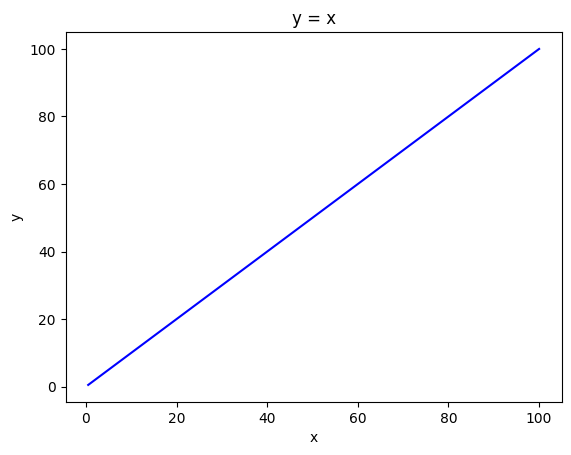

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y1 = x
plt.plot(x, y1, label='$y = x$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x')
plt.show()

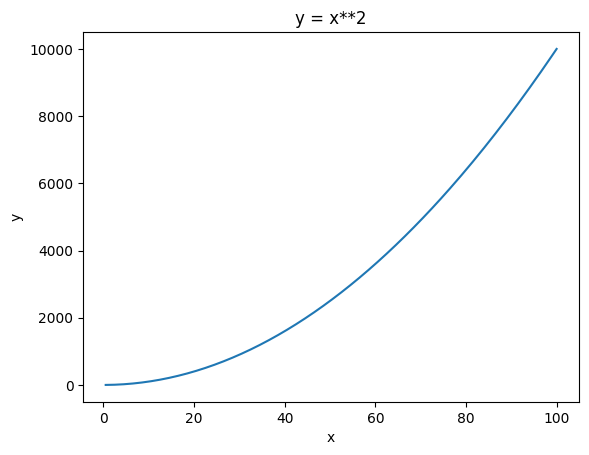

In [59]:
y2 = x**2
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x**2')
plt.show()

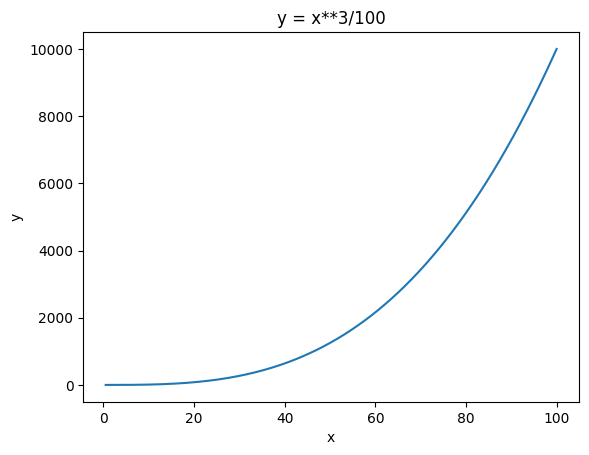

In [60]:
y3 = x**3 / 100
plt.plot(x, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x**3/100')
plt.show()

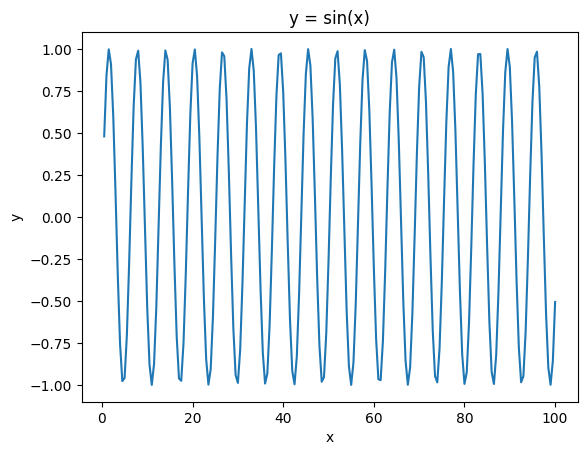

In [61]:
y4 = np.sin(x)
plt.plot(x, y4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)')
plt.show()

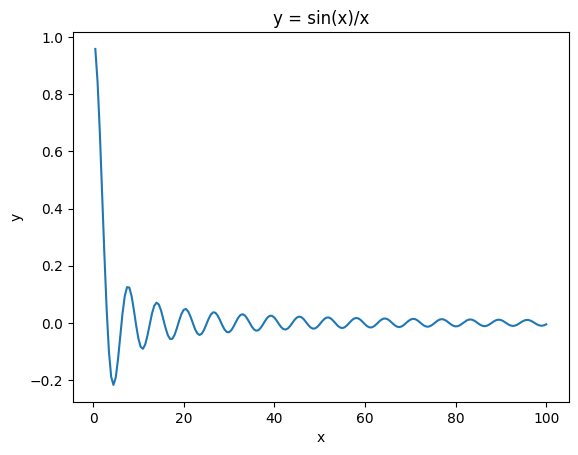

In [62]:
y5 = np.sin(x) / x
plt.plot(x, y5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(x)/x')
plt.show()

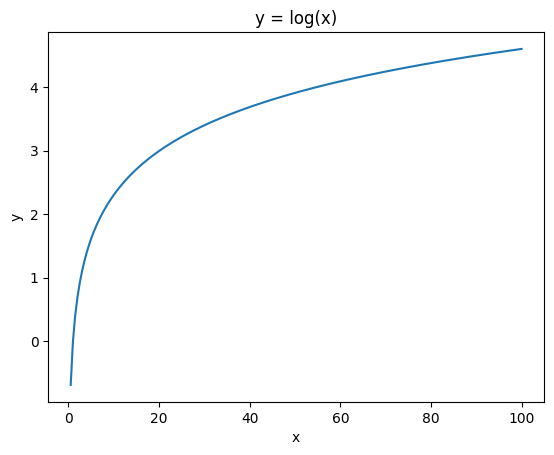

In [63]:
y6 = np.log(x)
plt.plot(x, y6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = log(x)')
plt.show()

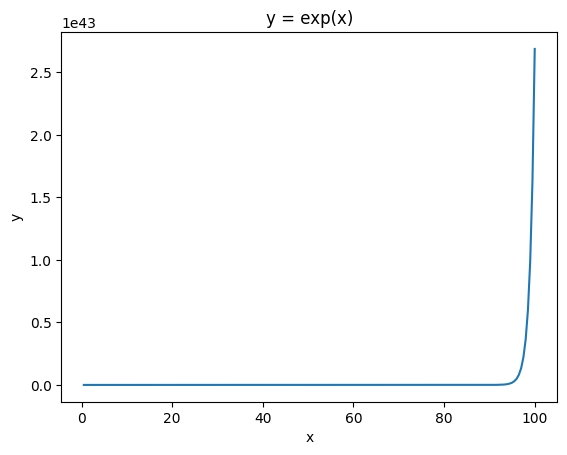

In [64]:
y7 = np.exp(x)
plt.plot(x, y7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = exp(x)')
plt.show()

Q.10

In [71]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))
df = pd.DataFrame(matrix)
df.columns = ['a', 'b', 'c', 'd', 'e']
print(df)
print("\n")
column_std = df.std()
highest_std_column = column_std.idxmax()

print("Standard Deviation of each column:")
print(column_std)
print(f"\nColumn with the highest standard deviation: '{highest_std_column}'")
print("\n")
row_mean = df.mean(axis=1)
lowest_mean_row = row_mean.idxmin()
print("Mean of each row:")
print(row_mean)
print(f"\nRow with the lowest mean: {lowest_mean_row}")

           a         b         c         d         e
0   1.539532  1.393005  1.948685  1.826531  1.081781
1   1.116669  1.449611  1.005176  1.551873  1.190967
2   1.341629  1.017924  1.623897  1.265939  1.026772
3   1.496999  1.952886  1.816886  1.621464  1.908194
4   1.462396  1.968318  1.731677  1.600752  1.865103
5   1.790701  1.612115  1.923215  1.516396  1.995501
6   1.182983  1.373538  1.597692  1.656654  1.426021
7   1.316795  1.079805  1.949282  1.982566  1.286910
8   1.430079  1.746012  1.075521  1.889444  1.110787
9   1.846377  1.299869  1.258192  1.770349  1.279910
10  1.859092  1.923616  1.988836  1.839764  1.323857
11  1.007525  1.327373  1.651194  1.961448  1.524346
12  1.728030  1.505513  1.143785  1.052692  1.672314
13  1.387278  1.405082  1.640605  1.272363  1.125593
14  1.832809  1.462573  1.131466  1.883066  1.243912
15  1.695715  1.972461  1.027944  1.456413  1.853994
16  1.422699  1.742776  1.213555  1.474173  1.888875
17  1.513703  1.702273  1.772483  1.480343  1.

Q.11

In [66]:
column_names = ['a','b','c','d','e']
df['f'] = df[column_names].sum(axis=1)
df['g'] = np.where(df['f']<8, 'LT8', 'GT8')
num_rows = len(df[df['g'] == 'LT8'])
print(f"The number of rows where 'g' is 'LT8' is: {num_rows}")
df_lt8 = df[df['g'] == 'LT8']
df_gt8 = df[df['g'] == 'GT8']
standard_deviation_lt8 = df_lt8['f'].std()
standard_deviation_gt8 = df_gt8['f'].std()
print("Standard deviation of f col where g == LT8 is: ",standard_deviation_lt8)
print("Standard deviation of f col where g == GT8 is: ",standard_deviation_gt8)

The number of rows where 'g' is 'LT8' is: 16
Standard deviation of f col where g == LT8 is:  0.38047513606957983
Standard deviation of f col where g == GT8 is:  0.45567509665258943


Q.12

In [69]:
import numpy as np
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
res = matrix * 5
print("\nResult of Matrix * Scalar:")
print(res)


Result of Matrix * Scalar:
[[ 5 10 15]
 [20 25 30]
 [35 40 45]]


Q.13

In [68]:
import numpy as np

def argmin(arr):
  if arr.size == 0:
    return -1
  min_idx = 0
  min_val = arr[0]
  for i in range(1, arr.size):
    if arr[i] < min_val:
      min_val = arr[i]
      min_idx = i

  return min_idx

arr = np.array([1, 2, 3, 4, 5])
res = argmin(arr)
res_check = np.argmin(arr)
if res == res_check:
  print("Correct")
else:
  print("Wrong")

Correct
